## What kind of questions are welcome on this site?
Stack overflow, Mathematics, Ask Ubuntu, Server Fault, Super User and Arqade.
## What, other than questions, does the site's home subdivide into?
The infomation about the campany, contacts and its social media websites.
## What information is available in each post?
The question topic, user name, answers an

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
question_2019=pd.read_csv('2019_questions.csv',parse_dates=['CreationDate'])

In [4]:
question_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
question_2019.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [6]:
question_2019['FavoriteCount'].fillna(0,inplace=True)

In [8]:
question_2019['FavoriteCount'].unique()

array([ 0.,  1.,  2.,  3., 11.,  4.,  5.,  7.,  6., 16.,  8.])

In [10]:
question_2019['FavoriteCount'].value_counts(dropna=True).sort_index()

0.0     7607
1.0      953
2.0      205
3.0       43
4.0       12
5.0        8
6.0        4
7.0        4
8.0        1
11.0       1
16.0       1
Name: FavoriteCount, dtype: int64

In [11]:
question_2019['Tags'].head()

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

In [12]:
question_2019['Tags'].str.replace('<','').str.replace('>',',')

0                           machine-learning,data-mining,
1       machine-learning,regression,linear-regression,...
2                python,time-series,forecast,forecasting,
3                      machine-learning,scikit-learn,pca,
4                    dataset,bigdata,data,speech-to-text,
                              ...                        
8834         pca,dimensionality-reduction,linear-algebra,
8835                         keras,weight-initialization,
8836                        python,visualization,seaborn,
8837                                         time-series,
8838                                                k-nn,
Name: Tags, Length: 8839, dtype: object

# Determining Most Popular Tags
First we will focus on the frequency of occurence of a tag being associated with a post. Then we will attach engagement metrics to the tags.

In [71]:
tag_count={}
for tag_list in question_2019['Tags']:
    for tag in tag_list:
        if tag in tag_count:
            tag_count[tag]+=1
        else:
            tag_count[tag]=1
            

In [81]:
tags=pd.DataFrame(list(tag_count.items()),columns=('tag','count'))
tags.sort_values('count',ascending=False).head()

,tag,count
2,,8839
0,machine-learning,2693
6,python,1814
22,deep-learning,1220
40,neural-network,1055


In [82]:
tags.iloc[2:3,0:1]=np.NaN

In [83]:
top_20_tags_frequency=tags.sort_values('count',ascending=False).head(20)

In [84]:
top_20_tags_frequency

,tag,count
2,NaN,8839
0,machine-learning,2693
6,python,1814
22,deep-learning,1220
40,neural-network,1055
23,keras,935
58,classification,685
46,tensorflow,584
10,scikit-learn,540
27,nlp,493


In [77]:
tag_views={}
for index, row in question_2019.iterrows():
    for tag in row['Tags']:
        if tag in tag_views:
            tag_views[tag]+=row['ViewCount']
        else:
            tag_views[tag]=row['ViewCount']


In [78]:
tag_tot_views=pd.DataFrame(list(tag_views.items()),columns=['tag','view'])

In [79]:
tag_tot_views['tag'][tag_tot_views['tag']=='']=np.nan

C:\Users\BAYONE~1\AppData\Local\Temp/ipykernel_11284/2676636460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tag_tot_views['tag'][tag_tot_views['tag']=='']=np.nan


In [87]:
top_20_view_count=tag_tot_views.sort_values('view',ascending=False).head(20)

In [88]:
top_20_view_count

,tag,view
2,NaN,1516313
6,python,537585
0,machine-learning,388499
23,keras,268608
22,deep-learning,233628
32,pandas,201787
40,neural-network,185367
10,scikit-learn,128110
46,tensorflow,121369
58,classification,104457


array([<AxesSubplot:title={'center':'view'}, ylabel='tag'>], dtype=object)

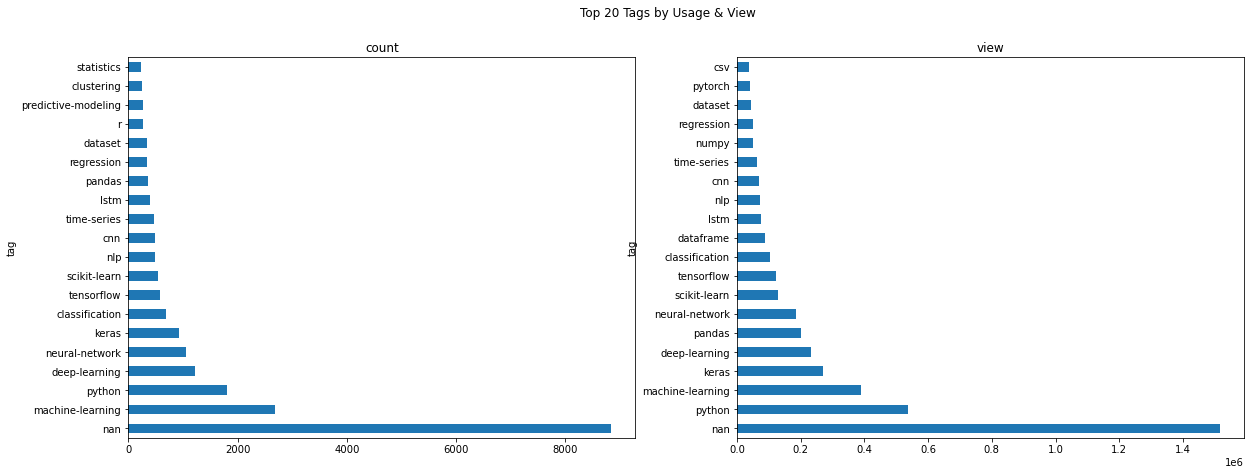

In [91]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,7))
top_20_tags_frequency.plot(kind='barh',x='tag',y='count',ax=axes[0],subplots=True,legend=False,title='Top 20 Tags by Usage & View')
top_20_view_count.plot(kind='barh',x='tag',y='view',legend=False,ax=axes[1],subplots=True,sharey=False)

# Popularity Marker Overlap
It will be useful indicator of popularity for us to know which tags are present in both the top 20 usage count and view count dataframes. Let's combine our dataframes to see which are in both and how they rank

In [93]:
views_in_usage_count=pd.merge(left=top_20_tags_frequency,right=top_20_view_count,how='left',left_on='tag',right_on='tag')
usage_count_in_views=pd.merge(left=top_20_tags_frequency,right=top_20_view_count,how='right',left_on='tag',right_on='tag')

In [94]:
print(views_in_usage_count)

                    tag  count       view
0                   NaN   8839  1516313.0
1      machine-learning   2693   388499.0
2                python   1814   537585.0
3         deep-learning   1220   233628.0
4        neural-network   1055   185367.0
5                 keras    935   268608.0
6        classification    685   104457.0
7            tensorflow    584   121369.0
8          scikit-learn    540   128110.0
9                   nlp    493    71382.0
10                  cnn    489    70349.0
11          time-series    466    64134.0
12                 lstm    402    74458.0
13               pandas    354   201787.0
14           regression    347    49451.0
15              dataset    340    43151.0
16                    r    268        NaN
17  predictive-modeling    265        NaN
18           clustering    257        NaN
19           statistics    234        NaN


In [95]:
print(usage_count_in_views)

                 tag   count     view
0                NaN  8839.0  1516313
1             python  1814.0   537585
2   machine-learning  2693.0   388499
3              keras   935.0   268608
4      deep-learning  1220.0   233628
5             pandas   354.0   201787
6     neural-network  1055.0   185367
7       scikit-learn   540.0   128110
8         tensorflow   584.0   121369
9     classification   685.0   104457
10         dataframe     NaN    89352
11              lstm   402.0    74458
12               nlp   493.0    71382
13               cnn   489.0    70349
14       time-series   466.0    64134
15             numpy     NaN    49767
16        regression   347.0    49451
17           dataset   340.0    43151
18           pytorch     NaN    40240
19               csv     NaN    38654


The tags in Top 20 usage count but not in Top 20 views are:

* r
* predictive modeling
* clustering
* statistics

The tags in Top 20 views but not in Top 20 usage count are:

* dataframe
* numpy
* pytorch
* csv

Let's expand this by taking the column names in both lists and creating

With our knowledge of the datascience domain, we can see that there is overlap between subject matter. For example, certain keywords are relevant to a specific programming language; pandas, sci-kit learn, numpy, and pytorch are all libraries of the Python programming language. Therefore, when posts are made about these libraries there, the python tag is typically also used, allowing us to double dip on popular related tags.

# All Popularity Metrics and Visualization
Let's dive deeper and create a dataframe that contains the top 10 from each category. From there we will normalize these datasets and create a visualization.

In [96]:
combined_metric_df=pd.merge(left=tags,right=tag_tot_views,how='inner',left_on='tag',right_on='tag')

Score, AnserCount, FavoriteCount

In [100]:
tag_score={}
tag_ac={}
tag_fc={}
def tag_pop_met(metric_name):
    tag_metric_total={}
    for index, row in question_2019.iterrows():
        for tag in row['Tags']:
            if tag in tag_metric_total:
                tag_metric_total[tag]+=row[metric_name]
            else:
                tag_metric_total[tag]=row[metric_name]
    dataframe=pd.DataFrame(list(tag_metric_total.items()),columns=['tag',metric_name])
    return dataframe


In [101]:
tag_score=tag_pop_met('Score')
tag_ac=tag_pop_met('AnswerCount')
tag_fc=tag_pop_met('FavoriteCount')

In [103]:
combined_metric_df=pd.merge(left=combined_metric_df,right=tag_score,how='inner',left_on='tag',right_on='tag')
combined_metric_df=pd.merge(left=combined_metric_df,right=tag_ac,how='inner',left_on='tag',right_on='tag')
combined_metric_df=pd.merge(left=combined_metric_df,right=tag_fc,how='inner',left_on='tag',right_on='tag')

In [104]:
combined_metric_df

,tag,count,view,Score_x,AnswerCount_x,Score_y,AnswerCount_y,FavoriteCount
0,machine-learning,2693,388499,2515,2313,2515,2313,575.0
1,data-mining,217,31056,186,183,186,183,31.0
2,regression,347,49451,277,309,277,309,47.0
3,linear-regression,175,18978,160,202,160,202,38.0
4,regularization,50,4941,52,39,52,39,5.0
...,...,...,...,...,...,...,...,...
521,encoder,1,16,1,1,1,1,0.0
522,label-smoothing,1,480,0,1,0,1,1.0
523,label-flipping,1,480,0,1,0,1,1.0
524,3d-object-detection,1,7,0,0,0,0,0.0


In [105]:
combined_metric_df.drop(['Score_y','AnswerCount_y'],axis=1,inplace=True)
combined_metric_df

,tag,count,view,Score_x,AnswerCount_x,FavoriteCount
0,machine-learning,2693,388499,2515,2313,575.0
1,data-mining,217,31056,186,183,31.0
2,regression,347,49451,277,309,47.0
3,linear-regression,175,18978,160,202,38.0
4,regularization,50,4941,52,39,5.0
...,...,...,...,...,...,...
521,encoder,1,16,1,1,0.0
522,label-smoothing,1,480,0,1,1.0
523,label-flipping,1,480,0,1,1.0
524,3d-object-detection,1,7,0,0,0.0


In [107]:
new_names={'Score_x':'Score','AnswerCount_x':'AnswerCount'}
combined_metric_df.rename(mapper=new_names,axis=1,inplace=True)

In [108]:
combined_metric_df

,tag,count,view,Score,AnswerCount,FavoriteCount
0,machine-learning,2693,388499,2515,2313,575.0
1,data-mining,217,31056,186,183,31.0
2,regression,347,49451,277,309,47.0
3,linear-regression,175,18978,160,202,38.0
4,regularization,50,4941,52,39,5.0
...,...,...,...,...,...,...
521,encoder,1,16,1,1,0.0
522,label-smoothing,1,480,0,1,1.0
523,label-flipping,1,480,0,1,1.0
524,3d-object-detection,1,7,0,0,0.0


We now have a dataframe with each popularity metric summed values for each tag. There are a lot of tags, however, and we are really interested in the top values for each of these metrics. Let's take the top 20 of each, combine the tags from each so we have the best performing tags from each regardless of how they perform across the others.

